In [2]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Project folder path
path = r'C:\Users\BhuwanDhakal\Sunita\Projects\2 Data Immersion\Python fundamental for Data Analysis\01-2024 Instacart Basket analysis'

In [4]:
path

'C:\\Users\\BhuwanDhakal\\Sunita\\Projects\\2 Data Immersion\\Python fundamental for Data Analysis\\01-2024 Instacart Basket analysis'

In [5]:
# Importing final_combined_data 
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_combined_data.pkl'))

In [6]:
# Checking the data
df.head()

,user_id,Gender,State,Age,date_joined,Number_of_Dependants,Family_Status,income,product_id,product_name,...,price_range_loc,busiest_day,busiest_days_modified,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Low-range product,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Low-range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


In [7]:
# Checking for  Statistics
df.describe()

KeyboardInterrupt: 

In [8]:
# Checking the number of rows and columns 
df.shape

(32404859, 32)

# Creating Histogram


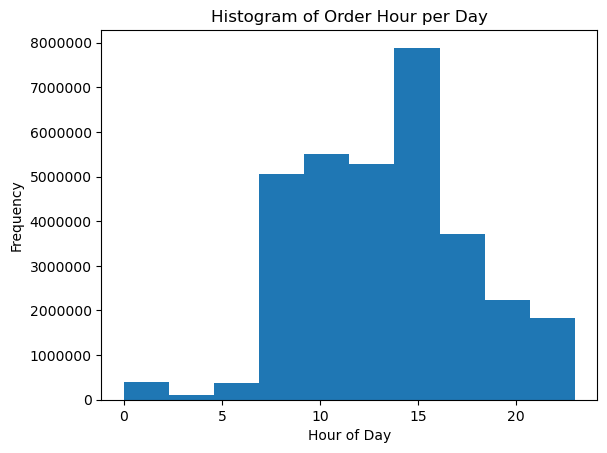

In [17]:
# Creating Histogram of the time_of_day column
hist = df['time_of_day'].plot.hist(bins = 10)

plt.title('Histogram of Order Hour per Day')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### There is highest sales between 9am to 4pm and peak hour of sales is 10am and 11 am. After 4pm and before 9 am there is a less sales .

In [92]:
# Checking the consistency of time_of_day column
df['time_of_day'].describe()

count    3.240486e+07
mean     1.342515e+01
std      4.246380e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: time_of_day, dtype: float64

# Creating Bar Chart

<AxesSubplot:>

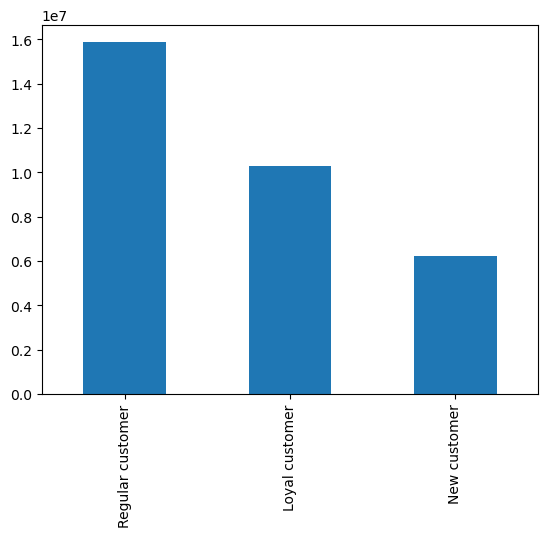

In [93]:
# Create a bar chart
df['loyalty_flag'].value_counts().plot.bar()

In [94]:
# Creating the frequencies of loyalty_flag
df['loyalty_flag'].value_counts(normalize=True)

Regular customer    0.489950
Loyal customer      0.317363
New customer        0.192687
Name: loyalty_flag, dtype: float64

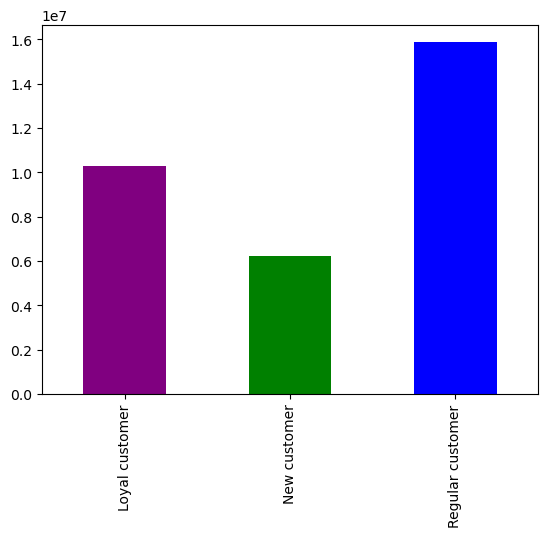

In [95]:
# Adding color in bar chart
bar = df['loyalty_flag'].value_counts().sort_index().plot.bar(color =['purple','green','blue'])

#### About half of the customers are Regular customers, 31 percent of the customers are Loyal Customers and 19 Percent of the customers are New Customers .

# Sampling Data

## Splitting dataframe into two dataframes at a 70/30¶

In [96]:
# Splitting dataframe into two dataframes at a 70/30
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [97]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [98]:
 np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [99]:
# create a list holding True/False values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(df)) <= 0.7

In [100]:
# store 70% of the sample in the dataframe big
big = df[dev]

In [101]:
# store 30% of the sample in the dataframe small
small = df[~dev]

In [102]:
# checking the len of whole Dataframe
len(df)

32404859

In [103]:
# checking the len of big and small Dataframe
len(big) + len(small)

32404859

### Creating linechart between prices and time_time_of_day

In [104]:
# Creating the new dataframe df_1 for prices and time_of_day
df_1 = small[['prices','time_of_day']]

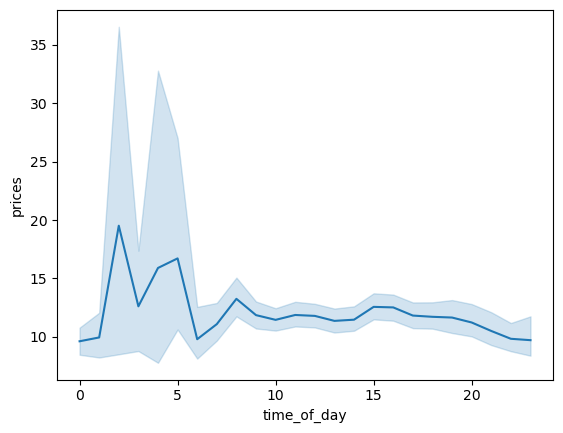

In [105]:
# Creating the line chart
line = sns.lineplot(data = df_1, x = 'time_of_day', y = 'prices')

#### Prices are high during the night from midnight to 5 AM. The prices go down in the afternoon.

### Creating linechart between age and Number_of_Dependants

In [106]:
# Creating the new dataframe df_2 for age and number of dependents
df_2 = small[['Number_of_Dependants','Age']]

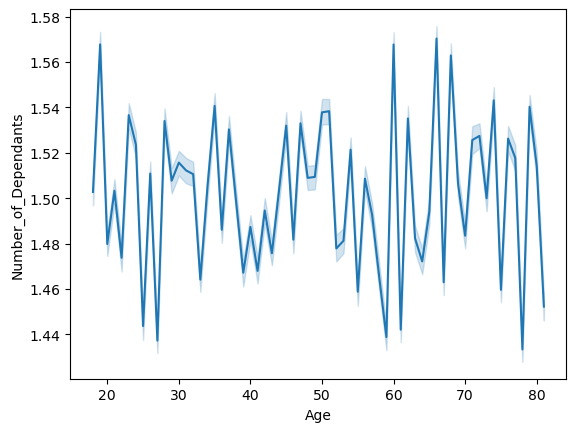

In [107]:
# Creating the line chart
line_1 = sns.lineplot(data = df_2, x = 'Age', y = 'Number_of_Dependants')

#### The number of dependents is almost same across all ages. The number of dependes is a bit higher for age group between 69 and 70 but it is not much different to other age groups 

### Creating scatterplot between income and age¶

In [108]:
# Creating the new dataframe df_2 for age and income
df_3 = small[['income','Age']]

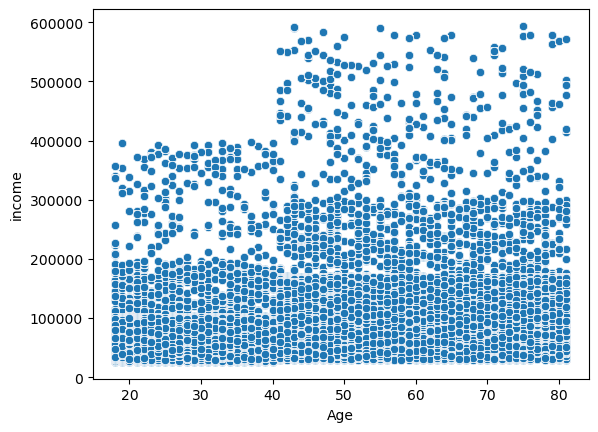

In [109]:
# Creating scatterplot
scatter = sns.scatterplot(x = 'Age', y = 'income',data = df_3)

#### The scatter plot show that the income is higher for the age group above 50. The income range upto 400,000 until age 40 but increases upto 600,000 after age 50 

# Exporting visualizations to .png format

In [18]:
#Exporting histogram of time_of_day 
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frequency time of day.png'))

In [111]:
#Exporting loyalty bar chart 
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loalty frequency.png'))

In [112]:
#Exporting histogram of time_of_day 
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price and time of day.png'))

In [113]:
#Exporting histogram of time_of_day 
line_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age amd number of dependents.png'))

In [114]:
#Exporting histogram of time_of_day 
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age and Income.png'))